# Principal component analysis, pictures, code and proofs

Principal component analysis is used to reduce the the number of dimensions needed to represent your data.

[[0.515 0.485]
 [0.485 0.515]]
(2, 100)


<IPython.core.display.Javascript object>


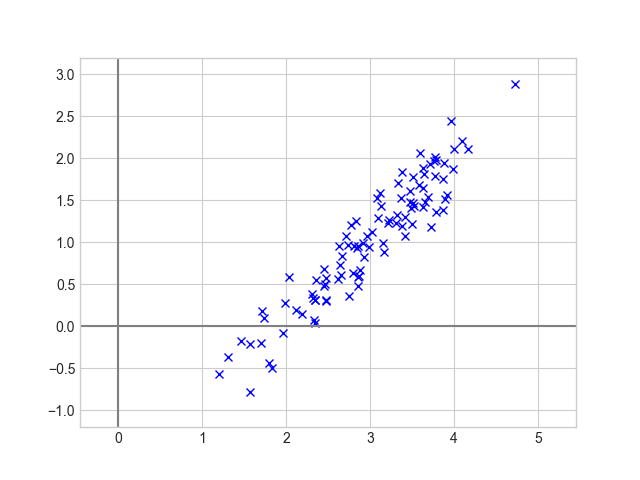

In [1]:
import numpy as np
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse


np.random.seed(0)

def generate_data(angle, x_len, y_len, x_offset, y_offset, num_examples):
    theta = np.radians(angle)
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c,-s), (s, c)))
    D = np.array([[x_len, 0], [0, y_len]])

    mean = [x_offset, y_offset]
    cov = np.linalg.inv(R) @ D @ R  # diagonal covariance
    print(cov)

    x, y = np.random.multivariate_normal(mean, cov, num_examples).T
    X = np.array(list(zip(x, y))).T
    return X

num_examples = 100
X = generate_data(45, 0.03, 1, 3, 1, num_examples)
print(X.shape)

plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.grid(True, which='both')
x_line = np.linspace(1, 5, 100)
y_line = x_line - 2
ax.plot(X[0,:], X[1,:],'bx', x_line, y_line, 'r', linestyle='None')
ax.axis('equal')
ax.axhline(0, color='gray')
ax.axvline(0, color='gray')
plt.show()

The data above is two dimensional, but it is "almost" one dimensional in the sense that every point is close to a line.

<IPython.core.display.Javascript object>


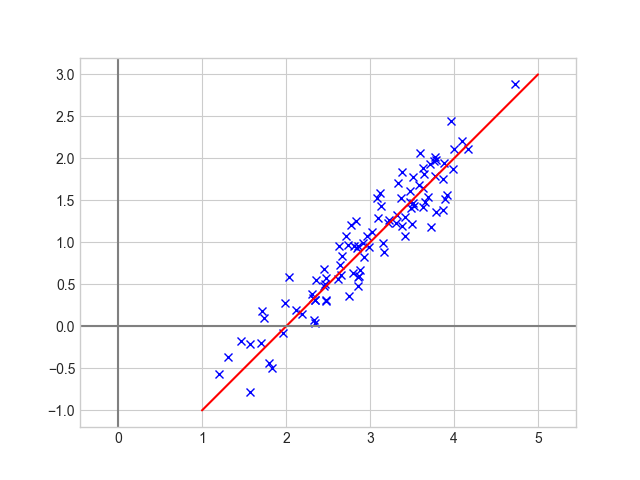

In [2]:
x_line = np.linspace(1, 5, 100)
y_line = x_line - 2
fig, ax = plt.subplots()
ax.plot(X[0,:], X[1,:],'bx', x_line, y_line, 'r')
ax.axis('equal')
ax.axhline(color='gray')
ax.axvline(color='gray')
plt.show()

Principal component analysis can help us understand the data better. Given the list of 2d points, $x_1, x_2, \dots , x_n \in \mathbb{R}^2$ we first center the data by calculating the mean $\overline{x} = \frac{1}{n}\sum_{i=1}^n x_i$ and replacing each $x_i$ with $x_i - \overline{x}$. Now the data looks like this.

<IPython.core.display.Javascript object>


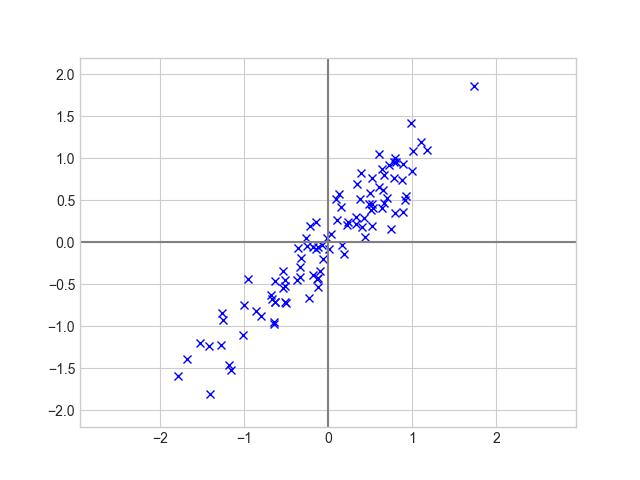

In [3]:
X = X - np.reshape(np.mean(X, axis=1), [2, 1])
x_line = np.linspace(-2, 2, 100)
y_line = x_line
fig, ax = plt.subplots()
ax.plot(X[0,:], X[1,:],'bx', x_line, y_line, 'r', linestyle='None')
ax.axis('equal')
ax.axhline(color='gray')
ax.axvline(color='gray')
plt.show()

We then put the data in a matrix.
$$
X = \begin{pmatrix}
| & | &  & | \\
x_1 & x_2 &\cdots & x_n \\
| & | &  & |\end{pmatrix}.
$$
And calculate the eigenvectors and eigenvalues of the *covariance matrix* $\frac{1}{n-1}XX^\top$.

In [4]:
cov = (1/(num_examples - 1)) * X @ X.T
e_vals, e_vecs = np.linalg.eig(cov)
lambda_1, lambda_2 = np.sqrt(e_vals)
v_1, v_2 = e_vecs[0], e_vecs[1]
print('e vals = ', e_vals)
print('e_vecs = ', e_vecs)

e vals =  [0.03125055 1.05496598]
e_vecs =  [[-0.71011191 -0.70408883]
 [ 0.70408883 -0.71011191]]


What do the eigenvectors and eigenvalues of the covariance matrix tell us? Well lets plot the eigenvectors with the data.

<IPython.core.display.Javascript object>


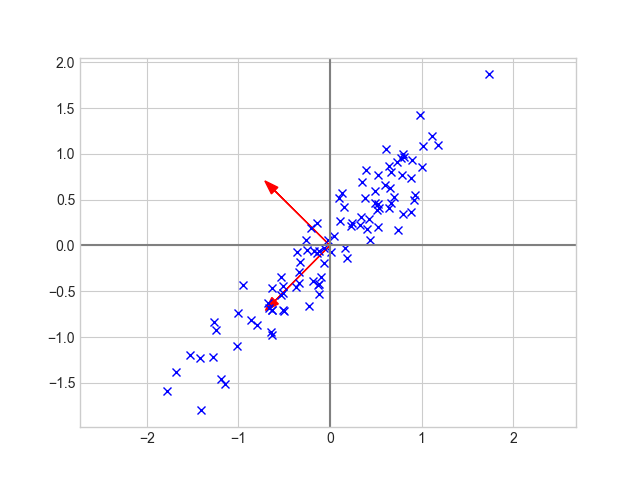

In [5]:
fig, ax = plt.subplots()
ax.plot(X[0,:], X[1,:],'bx')
ax.arrow(0, 0, e_vecs[0, 0], e_vecs[1, 0], head_width=0.1, length_includes_head=True, color='red')
ax.arrow(0, 0, e_vecs[0, 1], e_vecs[1, 1], head_width=0.1, length_includes_head=True, color='red')
ax.axis('equal')
ax.axhline(color='gray')
ax.axvline(color='gray')
plt.show()

The eigenvectors tell us the *direction* of the data. The first eignevector has the same slope as the data and the second eigenvector is perpendicular to the first. Now let's scale each of the eigenvectors by two time the square root of the eigenvalue.

<IPython.core.display.Javascript object>


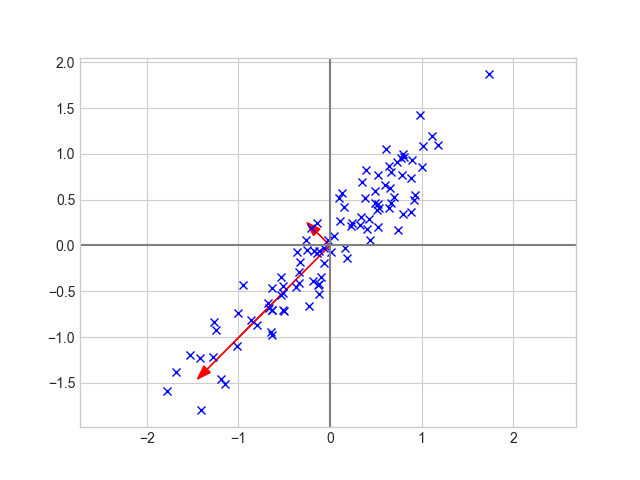

In [6]:
fig, ax = plt.subplots()
ax.plot(X[0,:], X[1,:],'bx')
ax.arrow(0, 0, 2 * lambda_1 * e_vecs[0, 0], 2 * lambda_1 * e_vecs[1, 0], head_width=0.1, length_includes_head=True, color='red')
ax.arrow(0, 0, 2 * lambda_2 * e_vecs[0, 1], 2 * lambda_2 * e_vecs[1, 1], head_width=0.1, length_includes_head=True, color='red')
ax.axis('equal')
ax.axhline(color='gray')
ax.axvline(color='gray')
plt.show()

And draw an ellipse around the data eigenvectors.

<IPython.core.display.Javascript object>


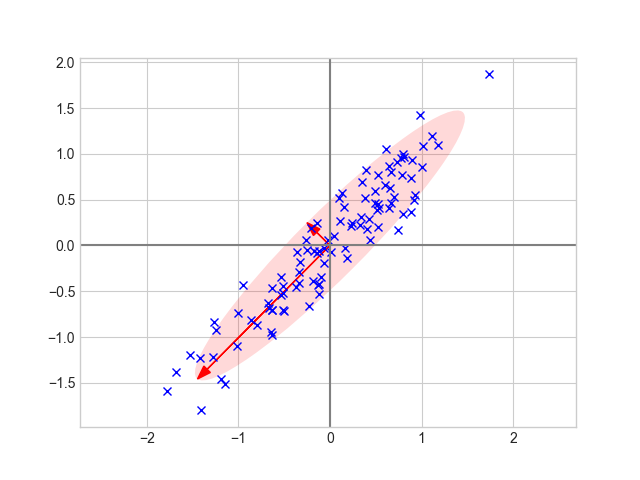

In [7]:
fig, ax = plt.subplots()
ax.plot(X[0,:], X[1,:],'bx')
ax.arrow(0, 0, 2 * lambda_1 * e_vecs[0, 0], 2 * lambda_1 * e_vecs[1, 0], head_width=0.1, length_includes_head=True, color='red')
ax.arrow(0, 0, 2 * lambda_2 * e_vecs[0, 1], 2 * lambda_2 * e_vecs[1, 1], head_width=0.1, length_includes_head=True, color='red')
e = Ellipse(xy=(0, 0), width=4*lambda_2, height=4*lambda_1, angle=45)
ax.add_artist(e)
e.set_clip_box(ax.bbox)
e.set_alpha(0.15)
e.set_facecolor([1, 0, 0])
ax.axis('equal')
ax.axhline(color='gray')
ax.axvline(color='gray')
plt.show()

The eigenvalues tell us how spread out the data is in the direction of that particular eigenvalue. Thus we can reduce the dimension of the data by projecting onto the line given by the largest eigenvalue.

<IPython.core.display.Javascript object>


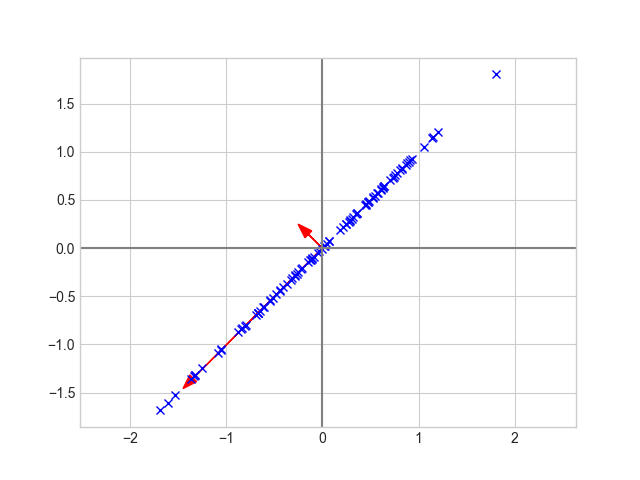

In [8]:
u = (1 / np.sqrt(2)) * np.array([[1], [1]])
Pu = u @ u.T
X_projected = Pu @ X
fig, ax = plt.subplots()
ax.plot(X_projected[0,:], X_projected[1,:],'bx')
ax.arrow(0, 0, 2 * lambda_1 * e_vecs[0, 0], 2 * lambda_1 * e_vecs[1, 0], head_width=0.1, length_includes_head=True, color='red')
ax.arrow(0, 0, 2 * lambda_2 * e_vecs[0, 1], 2 * lambda_2 * e_vecs[1, 1], head_width=0.1, length_includes_head=True, color='red')
ax.axis('equal')
ax.axhline(color='gray')
ax.axvline(color='gray')
plt.show()

The data is now one dimensional since it fits on a single line and each point is has not moved too far from its original spot.

In two dimensions this is the same as projecitng onto the line of best fit, but this technique generalizes. If your data is $n$-dimensional then PCA lets you find the best $m$-dimensional subspace to project the data down onto; you just project your data onto the subspace spanned by the $m$ eigenvectors with the largest eigenvalues. If $m << n$ this can compress your data a lot, and PCA guarantees that this $m$ dimensional subspace is optimal in the sense that it minimizes the mean squared error between the original data points and the projected data points.

The data in the plots above was generated using a random number generator. Let's try PCA on a real dataset.

We will use the mnist dataset, which is a collection of grayscale, 28x28 images of hand written digits. To simplify the analysis we will only look at zeros and ones in the dataset. Below is an example of the images from mnist.

In [9]:
import csv
ones = []
zeros = []
# Uses the mnist dataset from kaggle.
with open('train.csv', 'r') as csvfile:
    next(csvfile)
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        label = int(row[0])
        image = [int(x) for x in row[1:]]
        if label == 0:
            zeros.append(image)
        elif label == 1:
            ones.append(image)

zeros = np.array(zeros).T
ones = np.array(ones).T
print(zeros.shape)
print(ones.shape)



(784, 4132)
(784, 4684)


/Users/joellaity/ve/py3/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/Users/joellaity/ve/py3/lib/python3.6/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/Users/joellaity/ve/py3/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


<IPython.core.display.Javascript object>


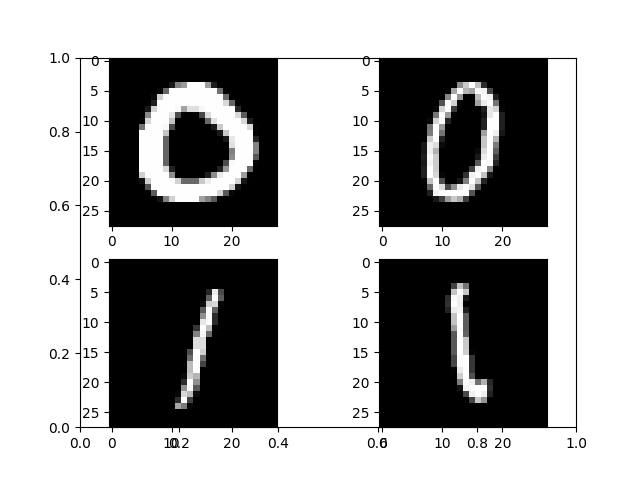

In [10]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
fig, ax = plt.subplots()
for i in range(1, 2+1):
    fig.add_subplot(2, 2, i)
    plt.imshow(np.reshape(zeros[:,i], [28, 28]), cmap='gray')
for i in range(2+1, 4+1):
    fig.add_subplot(2, 2, i)
    plt.imshow(np.reshape(ones[:,i], [28, 28]), cmap='gray')
plt.show()


We will now:
 * Flatten each image into a $784 = 28\times 28$ vector.
 * Use PCA to project each 784 dimensional vector to a vector in $\mathbb{R}^2$.
 * Plot the 2 dimensional vectors, with images of '0' in red and images of '1' in blue.

The result looks like this.

In [11]:
from sklearn.decomposition import PCA
zeros_and_ones = np.concatenate((zeros, ones), axis=1)
print(zeros_and_ones.shape)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(zeros_and_ones.T)
print(principalComponents[:4,:])
print(principalComponents[:, 0].shape)

(784, 8816)
[[1604.49483563 -452.15158717]
 [1882.3132816  -472.54807194]
 [ 481.38133906   89.18991598]
 [1006.03626488  549.43977452]]
(8816,)


<IPython.core.display.Javascript object>


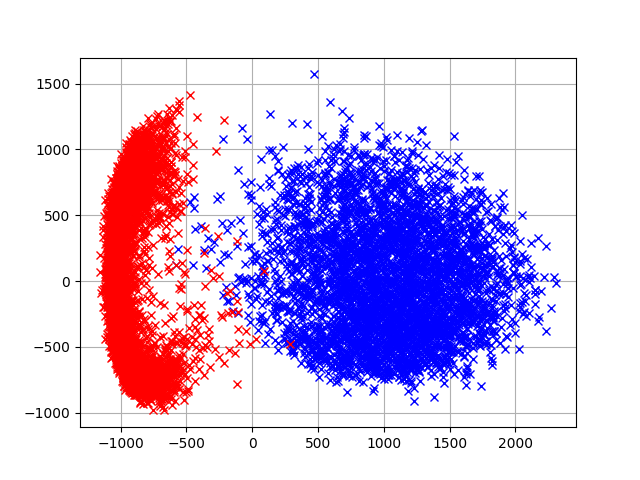

In [12]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.grid(True, which='both')
ax.plot(principalComponents[:4132, 0], principalComponents[:4132, 1],'bx')
ax.plot(principalComponents[4132:, 0], principalComponents[4132:, 1],'rx')
ax.axis('equal')
plt.show()

<IPython.core.display.Javascript object>


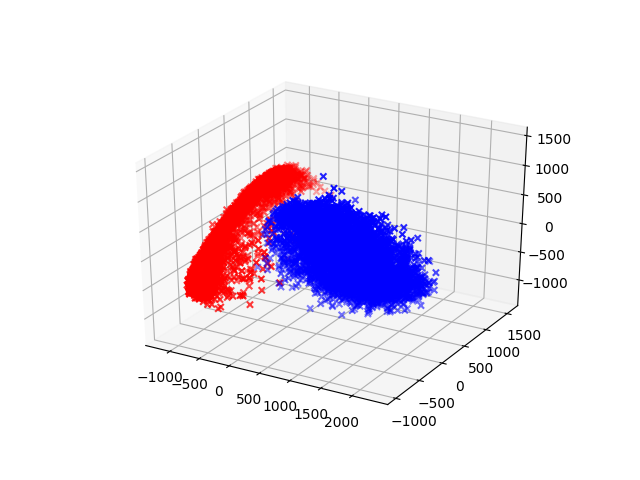

In [13]:
from mpl_toolkits.mplot3d import Axes3D
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(zeros_and_ones.T)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(principalComponents[:4132, 0], principalComponents[:4132, 1], principalComponents[:4132, 2], c='b', marker='x')
ax.scatter(principalComponents[4132:, 0], principalComponents[4132:, 1], principalComponents[4132:, 2], c='r', marker='x')
plt.show()

<IPython.core.display.Javascript object>


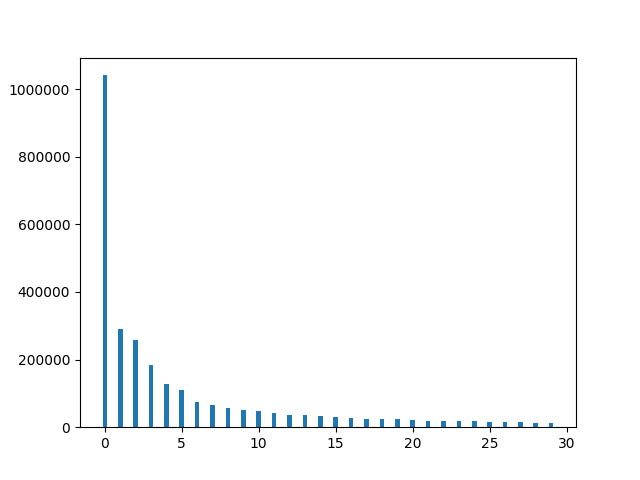

In [14]:
n_components = 30
pca_large = PCA(n_components=n_components)
principalComponents = pca_large.fit_transform(zeros_and_ones.T)
# print(np.arange(1, 785))
# print(pca_large.explained_variance_)
fig, ax = plt.subplots()
#ax.set_aspect('equal')
#ax.grid(True, which='both')
ax.bar(np.arange(n_components), pca_large.explained_variance_ , 0.3)
#ax.axis('equal')
plt.show()

In [15]:
plt.show()